# Assignment 4
##### Natalie Kim

## Question-1)
In this question, we will examine count data regression models on the ER_visit_lnm.csv.  Your model will predict the likelihood of Emergency Room visits within one year. Each sub-question is 20 points.

In [1]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
# Read csv file
ER = pd.read_csv('/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/linear-nonlinear data/ER_visit.csv')

In [3]:
ER.head()

,car,outdoor_activity,chronic_disease,household_history,gym,ER_visit
0,1,0.0,0.0,1,0,0
1,0,1.0,1.0,1,0,0
2,0,1.0,0.0,1,0,0
3,0,1.0,1.0,2,1,0
4,0,1.0,0.0,1,0,1


#### a)	Plot the ER_visit frequency.
hint: you can use Seaborn displot

/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


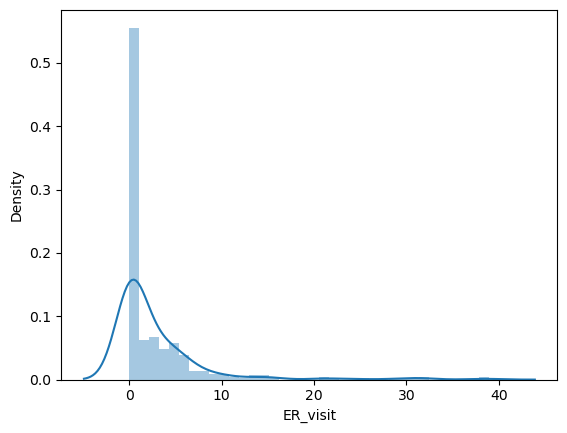

In [4]:
sns.distplot(ER['ER_visit'])

# Display the plot
plt.show()

#### b)	Run the Poisson regression on all the variables and interpret the results.


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Formula
formula = 'ER_visit ~ car + outdoor_activity + chronic_disease + household_history + gym'

# Fit Poisson Regression for all variables
model1 = glm(formula, data = ER, family = sm.families.Poisson()).fit()


print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               ER_visit   No. Observations:                  402
Model:                            GLM   Df Residuals:                      396
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.0
Date:                Wed, 14 Feb 2024   Deviance:                       1870.0
Time:                        18:41:20   Pearson chi2:                 2.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.8185
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0747      0.12

In [6]:
# Exponentiate Parameter Values
print(np.exp(0.3466)) # car
print(np.exp(0.5464)) # outdoor_activity
print(np.exp(0.0131)) # chronic_disease
print(np.exp(0.6732)) # household_history
print(np.exp(-0.6867)) # gym

1.4142509118505286
1.7270245250169742
1.0131861809121383
1.9605008964383412
0.5032340041823395


##### Interpretation

First we take exponentiate all of the parameter values to obtain the resonse function in terms of lambda. Then, for each of the parameters we interpet the following:

- The 'car' parameter is greater than 0 at 0.3466. After exponentiating it, we can conclude that for a 1-unit increase of the predictor 'car', the mean response of ER visits will be multiplied by 1.414, or in other words, increase by approximately 41%.
- The 'outdoor_activity' parameter is greater than 0 at 0.5464. After exponentiating it, we can conclude that for a 1-unit increase of the predictor 'outdoor_activity', the mean response of ER visits will be multiplied by 1.727, or in other words, increase by approximately 73%.
- The 'chronic_disease' parameter is greater than 0 at 0.0131. After exponentiating it, we can conclude that for a 1-unit increase of the predictor 'chronic_disease', the mean response of ER visits will be multiplied by 1.013, or in other words, increase by approximately 1.3%.
- The 'household_history' parameter is greater than 0 at 0.6732. After exponentiating it, we can conclude that for a 1-unit increase of the predictor 'household_history', the mean response of ER visits will be multiplied by 1.961, or in other words, increase by approximately 96%.
- The 'gym' parameter is less than 0 at -0.6867. After exponentiating it, we can conclude that for a 1-unit increase of the predictor 'gym', the mean response of ER visits will be divided by 0.503, or in other words, decrease by approximately 50%.

#### c)	Run the Negative Binomial regression. What kind of differences you observe in comparison with Poisson regression? Discuss/compare overdispersion in the models.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit Negative Binomial Regression for all variables
model2 = smf.glm(formula = formula, data = ER,family = sm.families.NegativeBinomial()).fit()

print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               ER_visit   No. Observations:                  402
Model:                            GLM   Df Residuals:                      396
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -772.66
Date:                Wed, 14 Feb 2024   Deviance:                       548.08
Time:                        18:41:20   Pearson chi2:                     788.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.0525      0.25

##### Overdispersion between Poisson and Negative Binomial visits

In [8]:
# Poisson Overdispersion
dispersion_ratio1= model1.pearson_chi2/model1.df_resid
print(dispersion_ratio1)

# Negative Binomial Overdispersion
dispersion_ratio2= model2.pearson_chi2/model2.df_resid
print(dispersion_ratio2)

6.315505697679716
1.9907083271121784


##### Interpretation
Between the two models, we see that the sign flips for chronic_disease, indicating that the number of ER visits would now decrease for every unit increae of a chronic_disease. However the confidence interval of the predictor still contains positive values.

The confidence intervals of the positive predictors are at higher values. For example, in the Poisson distribution, the 95% CI for the 'car' predictor is (0.215, 0.479), where both values are less than one. But for the negative binomial distribution, the CI is now (0.604, 1.161).

Both models indicate overdispersion based on their respective Pearson statistics. However, they indicate the degree of overdispersion on different levels. The Poisson model indicates more overdispersion since the value is **not** close 1 and additionally that the data is not drawn from a Poisson distirbution at 6.312. The negative binomial distribution on the other hand has a dispersion ration of approximately 2. Compared to the Poisson model's ratio, the data is more likely to be assumed to be drawn from the Poisson distirbution. However given that it is still greater than 1, it is still implied that there is overdispersion.

#### d)	Count the number of zero occurrences. Should we suspect from zero-inflation?

In [10]:
# Expected number of zero counts
mean_visits = np.mean(ER.ER_visit)
exp_zero_cnt = ((mean_visits**0)*np.exp(-mean_visits))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(mean_visits,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_ant = sum(ER['ER_visit'] == 0)

# Number of observations in crab dataset
num_obs = len(ER)

# Print the percentage of zero count observations in the sample
print('Zero counts in the sample: ', round(actual_zero_ant / num_obs,3)*100)

Expected zero counts given mean of  2.789 is  6.2
Zero counts in the sample:  48.5


Given that is our expected zero count is 6.2, but our actual is 48.5, we can confirm that there is in fact overdispersion in the sample using zero count method.

#### e)	Conduct a train test split with 80/20 ratio. Train zero inflated poisson regression and report RMSE. Finally visualize the actual vs predicted values on the test set.
(Hint: you can use https://www.statsmodels.org/stable/generated/statsmodels.discrete.count_model.ZeroInflatedPoisson.html#statsmodels.discrete.count_model.ZeroInflatedPoisson)

In [11]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
predictors = ER.drop('ER_visit', axis=1)
response = ER['ER_visit']

# Splitting the data into training and testing sets with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

In [13]:
# Train zero inflated poisson regression
from statsmodels.discrete.count_model import ZeroInflatedPoisson

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fitting the Zero-Inflated Poisson model
zip_model = ZeroInflatedPoisson(y_train, X_train_const).fit()

# Displaying the summary of the model fit
zip_model.summary()

Optimization terminated successfully.
         Current function value: 2.579903
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25


/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                ER_visit   No. Observations:                  321
Model:             ZeroInflatedPoisson   Df Residuals:                      315
Method:                            MLE   Df Model:                            5
Date:                 Wed, 14 Feb 2024   Pseudo R-squ.:                  0.1674
Time:                         18:44:21   Log-Likelihood:                -828.15
converged:                        True   LL-Null:                       -994.67
Covariance Type:             nonrobust   LLR p-value:                 7.789e-70
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_const        -0.2832      0.118     -2.404      0.016      -0.514      -0.052
const                 0.4310      0.167      2.584      0.010       0.104       0.758
car                  -0.8564      0.137     -6.233      0.000      -1.126      -0.587
outdoor_activity      0.1618      0.098      1.654      0.098      -0.030       0.354
chronic_disease       0.0445      0.011      3.914      0.000       0.022       0.067
household_history     0.5157      0.039     13.301      0.000       0.440       0.592
gym                  -0.3942      0.050     -7.945      0.000      -0.491      -0.297
=====================================================================================
"""

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = zip_model.predict(X_test_const)


# Calculate RMSE again
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ")
rmse

RMSE: 


3.094438614753096

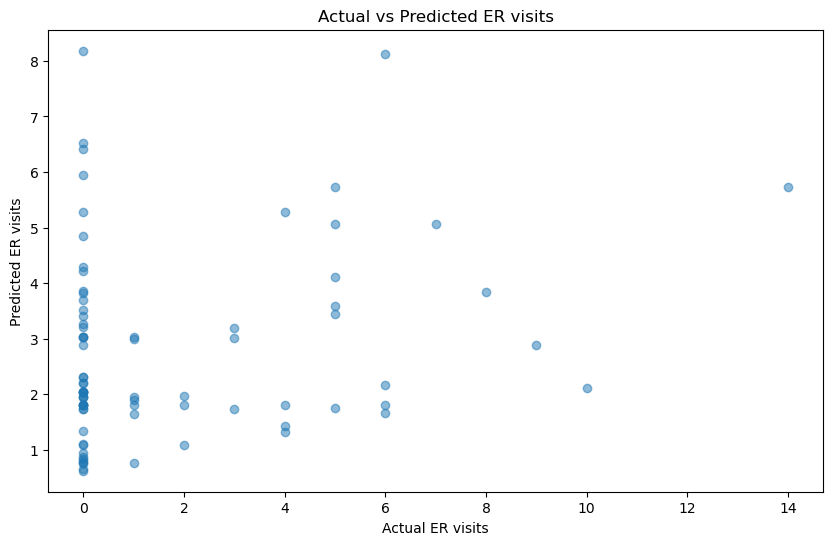

In [15]:
# Visualize the actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual ER visits')
plt.ylabel('Predicted ER visits')
plt.title('Actual vs Predicted ER visits')
plt.show()
